In [1]:
# Import libraries
import time
import sagemaker
import boto3
import re
import json
import gzip
from sklearn.metrics import classification_report, confusion_matrix
import io
import pandas
from io import StringIO
import matplotlib.pyplot as plt
import math
from collections import Counter
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection  import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pickle
import nltk
nltk.download("punkt")
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /home/ec2-user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [13]:
!which python3

/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/bin/python3


In [2]:
with open("/home/ec2-user/SageMaker/email_phishing/Huaibo/data/results_test.csv", 'r') as f:
    result_test = pd.read_csv(f)

FileNotFoundError: [Errno 2] No such file or directory: '/home/ec2-user/SageMaker/email_phishing/Huaibo/data/results_test.csv'

In [ ]:
result_test.text.dropna()

## SVM model

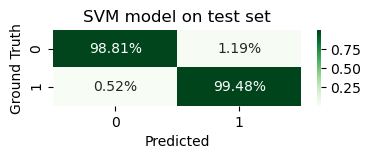

In [12]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_1 = confusion_matrix(result_test['label'].values, result_test['preds_svm'].values, normalize = 'true')
fig, (ax1) = plt.subplots(1,1, sharex=True, sharey=True,figsize=(4,1), dpi= 100, facecolor='w', edgecolor='k')
labels = ['0', '1']
cmap = sns.color_palette("Greens", as_cmap=True)
sns.heatmap(cm_1,annot=True, fmt=".2%", xticklabels = labels, yticklabels = labels, ax=ax1 ,cmap = cmap)
ax1.set(xlabel='Predicted', ylabel='Ground Truth', title='SVM model on test set')
plt.savefig("images/base_svm.png")
plt.show()

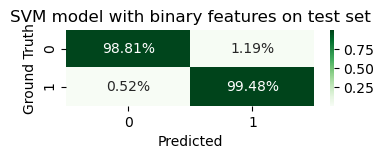

In [13]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_1 = confusion_matrix(result_test['label'].values, result_test['preds_feature_svm'].values, normalize = 'true')
fig, (ax1) = plt.subplots(1,1, sharex=True, sharey=True,figsize=(4,1), dpi= 100, facecolor='w', edgecolor='k')
labels = ['0', '1']
cmap = sns.color_palette("Greens", as_cmap=True)
sns.heatmap(cm_1,annot=True, fmt=".2%", xticklabels = labels, yticklabels = labels, ax=ax1 ,cmap = cmap)
ax1.set(xlabel='Predicted', ylabel='Ground Truth', title='SVM model with binary features on test set')
plt.savefig("images/feature_svm.png")
plt.show()

---
## Random Forest Model

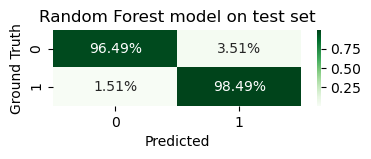

In [14]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_1 = confusion_matrix(result_test['label'].values, result_test['preds_rf'].values, normalize = 'true')
fig, (ax1) = plt.subplots(1,1, sharex=True, sharey=True,figsize=(4,1), dpi= 100, facecolor='w', edgecolor='k')
labels = ['0', '1']
cmap = sns.color_palette("Greens", as_cmap=True)
sns.heatmap(cm_1,annot=True, fmt=".2%", xticklabels = labels, yticklabels = labels, ax=ax1 ,cmap = cmap)
ax1.set(xlabel='Predicted', ylabel='Ground Truth', title='Random Forest model on test set')
plt.savefig("images/base_rf.png")
plt.show()

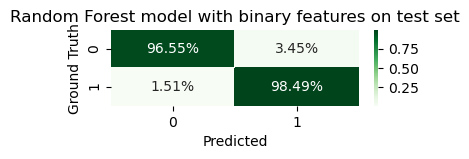

In [15]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_1 = confusion_matrix(result_test['label'].values, result_test['preds_feature_rf'].values, normalize = 'true')
fig, (ax1) = plt.subplots(1,1, sharex=True, sharey=True,figsize=(4,1), dpi= 100, facecolor='w', edgecolor='k')
labels = ['0', '1']
cmap = sns.color_palette("Greens", as_cmap=True)
sns.heatmap(cm_1,annot=True, fmt=".2%", xticklabels = labels, yticklabels = labels, ax=ax1 ,cmap = cmap)
ax1.set(xlabel='Predicted', ylabel='Ground Truth', title='Random Forest model with binary features on test set')
plt.savefig("images/feature_rf.png")
plt.show()

---
## Logistic Regression Model

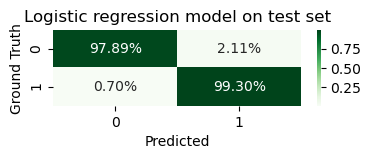

In [16]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_1 = confusion_matrix(result_test['label'].values, result_test['preds_lr'].values, normalize = 'true')
fig, (ax1) = plt.subplots(1,1, sharex=True, sharey=True,figsize=(4,1), dpi= 100, facecolor='w', edgecolor='k')
labels = ['0', '1']
cmap = sns.color_palette("Greens", as_cmap=True)
sns.heatmap(cm_1,annot=True, fmt=".2%", xticklabels = labels, yticklabels = labels, ax=ax1 ,cmap = cmap)
ax1.set(xlabel='Predicted', ylabel='Ground Truth', title='Logistic regression model on test set')
plt.savefig("images/base_lr.png")
plt.show()

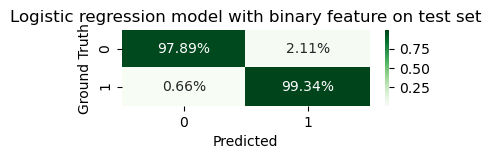

In [17]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_1 = confusion_matrix(result_test['label'].values, result_test['preds_feature_lr'].values, normalize = 'true')
fig, (ax1) = plt.subplots(1,1, sharex=True, sharey=True,figsize=(4,1), dpi= 100, facecolor='w', edgecolor='k')
labels = ['0', '1']
cmap = sns.color_palette("Greens", as_cmap=True)
sns.heatmap(cm_1,annot=True, fmt=".2%", xticklabels = labels, yticklabels = labels, ax=ax1 ,cmap = cmap)
ax1.set(xlabel='Predicted', ylabel='Ground Truth', title='Logistic regression model with binary feature on test set')
plt.savefig("images/feature_lr.png")
plt.show()

---
## LSTM Model

In [22]:
preds = result_test['preds_lstm'].values
test_y = result_test['label'].values

print(classification_report(test_y, preds))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      9691
           1       0.99      0.99      0.99     14939

    accuracy                           0.99     24630
   macro avg       0.99      0.99      0.99     24630
weighted avg       0.99      0.99      0.99     24630



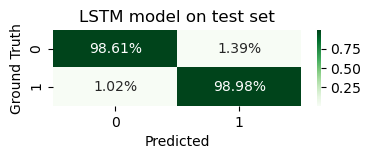

In [18]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_1 = confusion_matrix(result_test['label'].values, result_test['preds_lstm'].values, normalize = 'true')
fig, (ax1) = plt.subplots(1,1, sharex=True, sharey=True,figsize=(4,1), dpi= 100, facecolor='w', edgecolor='k')
labels = ['0', '1']
cmap = sns.color_palette("Greens", as_cmap=True)
sns.heatmap(cm_1,annot=True, fmt=".2%", xticklabels = labels, yticklabels = labels, ax=ax1 ,cmap = cmap)
ax1.set(xlabel='Predicted', ylabel='Ground Truth', title='LSTM model on test set')
plt.savefig("images/base_lstm.png")
plt.show()

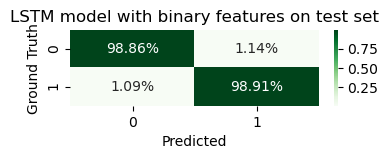

In [19]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_1 = confusion_matrix(result_test['label'].values, result_test['preds_feature_lstm'].values, normalize = 'true')
fig, (ax1) = plt.subplots(1,1, sharex=True, sharey=True,figsize=(4,1), dpi= 100, facecolor='w', edgecolor='k')
labels = ['0', '1']
cmap = sns.color_palette("Greens", as_cmap=True)
sns.heatmap(cm_1,annot=True, fmt=".2%", xticklabels = labels, yticklabels = labels, ax=ax1 ,cmap = cmap)
ax1.set(xlabel='Predicted', ylabel='Ground Truth', title='LSTM model with binary features on test set')
plt.savefig("images/feature_lstm.png")
plt.show()

---
## DistilBERT Model

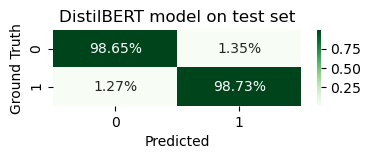

In [20]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_1 = confusion_matrix(result_test['label'].values, result_test['preds_distilbert'].values, normalize = 'true')
fig, (ax1) = plt.subplots(1,1, sharex=True, sharey=True,figsize=(4,1), dpi= 100, facecolor='w', edgecolor='k')
labels = ['0', '1']
cmap = sns.color_palette("Greens", as_cmap=True)
sns.heatmap(cm_1,annot=True, fmt=".2%", xticklabels = labels, yticklabels = labels, ax=ax1 ,cmap = cmap)
ax1.set(xlabel='Predicted', ylabel='Ground Truth', title='DistilBERT model on test set')
plt.savefig("images/base_distilbert.png")
plt.show()

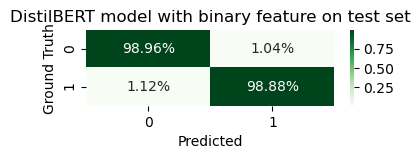

In [21]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_1 = confusion_matrix(result_test['label'].values, result_test['preds_feature_distilbert'].values, normalize = 'true')
fig, (ax1) = plt.subplots(1,1, sharex=True, sharey=True,figsize=(4,1), dpi= 100, facecolor='w', edgecolor='k')
labels = ['0', '1']
cmap = sns.color_palette("Greens", as_cmap=True)
sns.heatmap(cm_1,annot=True, fmt=".2%", xticklabels = labels, yticklabels = labels, ax=ax1 ,cmap = cmap)
ax1.set(xlabel='Predicted', ylabel='Ground Truth', title='DistilBERT model with binary feature on test set')
plt.savefig("images/feature_distilbert.png")
plt.show()

---
## BERT Model

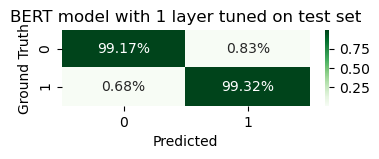

In [22]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_1 = confusion_matrix(result_test['label'].values, result_test['preds_bert'].values, normalize = 'true')
fig, (ax1) = plt.subplots(1,1, sharex=True, sharey=True,figsize=(4,1), dpi= 100, facecolor='w', edgecolor='k')
labels = ['0', '1']
cmap = sns.color_palette("Greens", as_cmap=True)
sns.heatmap(cm_1,annot=True, fmt=".2%", xticklabels = labels, yticklabels = labels, ax=ax1 ,cmap = cmap)
ax1.set(xlabel='Predicted', ylabel='Ground Truth', title='BERT model with 1 layer tuned on test set')
plt.savefig("images/base_bert.png")
plt.show()

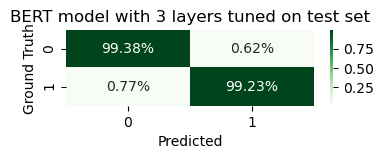

In [23]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_1 = confusion_matrix(result_test['label'].values, result_test['preds_bert_3'].values, normalize = 'true')
fig, (ax1) = plt.subplots(1,1, sharex=True, sharey=True,figsize=(4,1), dpi= 100, facecolor='w', edgecolor='k')
labels = ['0', '1']
cmap = sns.color_palette("Greens", as_cmap=True)
sns.heatmap(cm_1,annot=True, fmt=".2%", xticklabels = labels, yticklabels = labels, ax=ax1 ,cmap = cmap)
ax1.set(xlabel='Predicted', ylabel='Ground Truth', title='BERT model with 3 layers tuned on test set')
plt.savefig("images/base_bert_3.png")
plt.show()

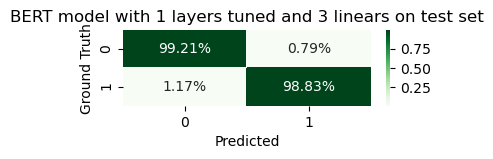

In [10]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_1 = confusion_matrix(result_test['label'].values, result_test['preds_bert_1_extra'].values, normalize = 'true')
fig, (ax1) = plt.subplots(1,1, sharex=True, sharey=True,figsize=(4,1), dpi= 100, facecolor='w', edgecolor='k')
labels = ['0', '1']
cmap = sns.color_palette("Greens", as_cmap=True)
sns.heatmap(cm_1,annot=True, fmt=".2%", xticklabels = labels, yticklabels = labels, ax=ax1 ,cmap = cmap)
ax1.set(xlabel='Predicted', ylabel='Ground Truth', title='BERT model with 1 layers tuned and 3 linears on test set')
plt.show()

## FeatureBert Model

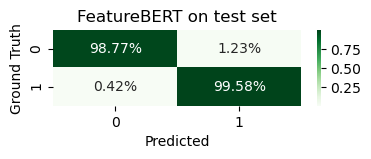

In [4]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_1 = confusion_matrix(result_test['label'].values, result_test['preds_featurebert'].values, normalize = 'true')
fig, (ax1) = plt.subplots(1,1, sharex=True, sharey=True,figsize=(4,1), dpi= 100, facecolor='w', edgecolor='k')
labels = ['0', '1']
cmap = sns.color_palette("Greens", as_cmap=True)
sns.heatmap(cm_1,annot=True, fmt=".2%", xticklabels = labels, yticklabels = labels, ax=ax1 ,cmap = cmap)
ax1.set(xlabel='Predicted', ylabel='Ground Truth', title='FeatureBERT on test set')
plt.show()

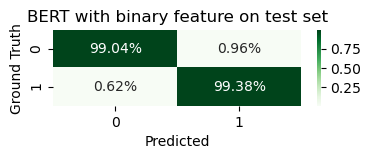

In [24]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_1 = confusion_matrix(result_test['label'].values, result_test['preds_featurebert_2'].values, normalize = 'true')
fig, (ax1) = plt.subplots(1,1, sharex=True, sharey=True,figsize=(4,1), dpi= 100, facecolor='w', edgecolor='k')
labels = ['0', '1']
cmap = sns.color_palette("Greens", as_cmap=True)
sns.heatmap(cm_1,annot=True, fmt=".2%", xticklabels = labels, yticklabels = labels, ax=ax1 ,cmap = cmap)
ax1.set(xlabel='Predicted', ylabel='Ground Truth', title='BERT with binary feature on test set')
plt.savefig("images/feature_bert.png")
plt.show()

# Validation on nazario

In [9]:
with open("/home/ec2-user/SageMaker/email_phishing/Huaibo/data/results_valid.csv", 'r') as f:
    result_valid = pd.read_csv(f)

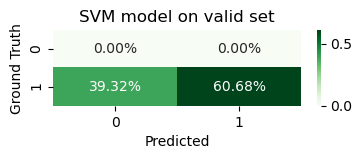

In [25]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_1 = confusion_matrix(result_valid['label'].values, result_valid['preds_svm'].values, normalize = 'true')
fig, (ax1) = plt.subplots(1,1, sharex=True, sharey=True,figsize=(4,1), dpi= 100, facecolor='w', edgecolor='k')
labels = ['0', '1']
cmap = sns.color_palette("Greens", as_cmap=True)
sns.heatmap(cm_1,annot=True, fmt=".2%", xticklabels = labels, yticklabels = labels, ax=ax1 ,cmap = cmap)
ax1.set(xlabel='Predicted', ylabel='Ground Truth', title='SVM model on valid set')
plt.savefig("images/valid_svm.png")
plt.show()

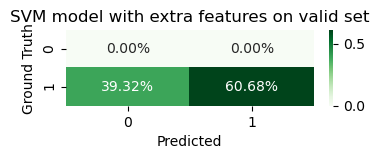

In [25]:
cm_1 = confusion_matrix(result_valid['label'].values, result_valid['preds_feature_svm'].values, normalize = 'true')
fig, (ax1) = plt.subplots(1,1, sharex=True, sharey=True,figsize=(4,1), dpi= 100, facecolor='w', edgecolor='k')
labels = ['0', '1']
cmap = sns.color_palette("Greens", as_cmap=True)
sns.heatmap(cm_1,annot=True, fmt=".2%", xticklabels = labels, yticklabels = labels, ax=ax1 ,cmap = cmap)
ax1.set(xlabel='Predicted', ylabel='Ground Truth', title='SVM model with extra features on valid set')
plt.show()

---

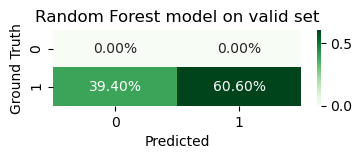

In [26]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_1 = confusion_matrix(result_valid['label'].values, result_valid['preds_rf'].values, normalize = 'true')
fig, (ax1) = plt.subplots(1,1, sharex=True, sharey=True,figsize=(4,1), dpi= 100, facecolor='w', edgecolor='k')
labels = ['0', '1']
cmap = sns.color_palette("Greens", as_cmap=True)
sns.heatmap(cm_1,annot=True, fmt=".2%", xticklabels = labels, yticklabels = labels, ax=ax1 ,cmap = cmap)
ax1.set(xlabel='Predicted', ylabel='Ground Truth', title='Random Forest model on valid set')
plt.savefig("images/valid_rf.png")
plt.show()

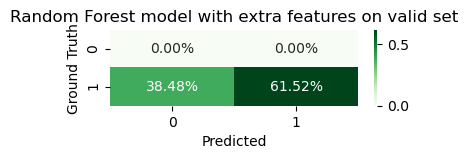

In [6]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_1 = confusion_matrix(result_valid['label'].values, result_valid['preds_feature_rf'].values, normalize = 'true')
fig, (ax1) = plt.subplots(1,1, sharex=True, sharey=True,figsize=(4,1), dpi= 100, facecolor='w', edgecolor='k')
labels = ['0', '1']
cmap = sns.color_palette("Greens", as_cmap=True)
sns.heatmap(cm_1,annot=True, fmt=".2%", xticklabels = labels, yticklabels = labels, ax=ax1 ,cmap = cmap)
ax1.set(xlabel='Predicted', ylabel='Ground Truth', title='Random Forest model with extra features on valid set')
plt.show()

---

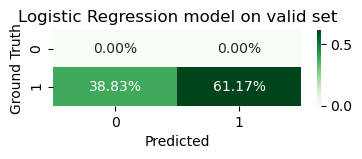

In [27]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_1 = confusion_matrix(result_valid['label'].values, result_valid['preds_lr'].values, normalize = 'true')
fig, (ax1) = plt.subplots(1,1, sharex=True, sharey=True,figsize=(4,1), dpi= 100, facecolor='w', edgecolor='k')
labels = ['0', '1']
cmap = sns.color_palette("Greens", as_cmap=True)
sns.heatmap(cm_1,annot=True, fmt=".2%", xticklabels = labels, yticklabels = labels, ax=ax1 ,cmap = cmap)
ax1.set(xlabel='Predicted', ylabel='Ground Truth', title='Logistic Regression model on valid set')
plt.savefig("images/valid_lr.png")
plt.show()

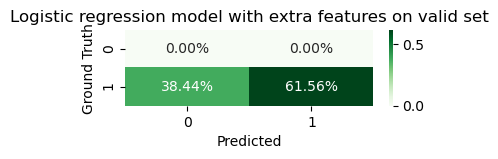

In [5]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_1 = confusion_matrix(result_valid['label'].values, result_valid['preds_feature_lr'].values, normalize = 'true')
fig, (ax1) = plt.subplots(1,1, sharex=True, sharey=True,figsize=(4,1), dpi= 100, facecolor='w', edgecolor='k')
labels = ['0', '1']
cmap = sns.color_palette("Greens", as_cmap=True)
sns.heatmap(cm_1,annot=True, fmt=".2%", xticklabels = labels, yticklabels = labels, ax=ax1 ,cmap = cmap)
ax1.set(xlabel='Predicted', ylabel='Ground Truth', title='Logistic regression model with extra features on valid set')
plt.show()

---

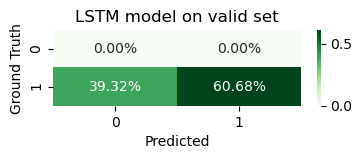

In [29]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_1 = confusion_matrix(result_valid['label'].values, result_valid['preds_lstm'].values, normalize = 'true')
fig, (ax1) = plt.subplots(1,1, sharex=True, sharey=True,figsize=(4,1), dpi= 100, facecolor='w', edgecolor='k')
labels = ['0', '1']
cmap = sns.color_palette("Greens", as_cmap=True)
sns.heatmap(cm_1,annot=True, fmt=".2%", xticklabels = labels, yticklabels = labels, ax=ax1 ,cmap = cmap)
ax1.set(xlabel='Predicted', ylabel='Ground Truth', title='LSTM model on valid set')
plt.savefig("images/valid_lstm.png")
plt.show()

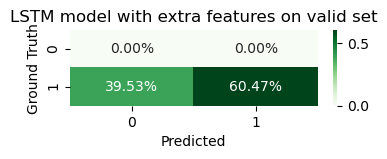

In [10]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_1 = confusion_matrix(result_valid['label'].values, result_valid['preds_feature_lstm'].values, normalize = 'true')
fig, (ax1) = plt.subplots(1,1, sharex=True, sharey=True,figsize=(4,1), dpi= 100, facecolor='w', edgecolor='k')
labels = ['0', '1']
cmap = sns.color_palette("Greens", as_cmap=True)
sns.heatmap(cm_1,annot=True, fmt=".2%", xticklabels = labels, yticklabels = labels, ax=ax1 ,cmap = cmap)
ax1.set(xlabel='Predicted', ylabel='Ground Truth', title='LSTM model with extra features on valid set')
# plt.savefig("images/valid_lstm.png")
plt.show()

---

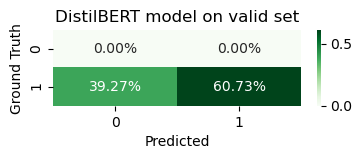

In [42]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_1 = confusion_matrix(result_valid['label'].values, result_valid['preds_distilbert'].values, normalize = 'true')
fig, (ax1) = plt.subplots(1,1, sharex=True, sharey=True,figsize=(4,1), dpi= 100, facecolor='w', edgecolor='k')
labels = ['0', '1']
cmap = sns.color_palette("Greens", as_cmap=True)
sns.heatmap(cm_1,annot=True, fmt=".2%", xticklabels = labels, yticklabels = labels, ax=ax1 ,cmap = cmap)
ax1.set(xlabel='Predicted', ylabel='Ground Truth', title='DistilBERT model on valid set')
plt.savefig("images/valid_distilbert.png")
plt.show()

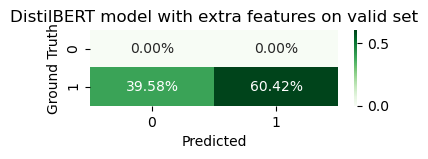

In [6]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_1 = confusion_matrix(result_valid['label'].values, result_valid['preds_feature_distilbert'].values, normalize = 'true')
fig, (ax1) = plt.subplots(1,1, sharex=True, sharey=True,figsize=(4,1), dpi= 100, facecolor='w', edgecolor='k')
labels = ['0', '1']
cmap = sns.color_palette("Greens", as_cmap=True)
sns.heatmap(cm_1,annot=True, fmt=".2%", xticklabels = labels, yticklabels = labels, ax=ax1 ,cmap = cmap)
ax1.set(xlabel='Predicted', ylabel='Ground Truth', title='DistilBERT model with extra features on valid set')
plt.show()

---

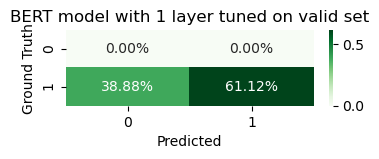

In [73]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_1 = confusion_matrix(result_valid['label'].values, result_valid['preds_bert'].values, normalize = 'true')
fig, (ax1) = plt.subplots(1,1, sharex=True, sharey=True,figsize=(4,1), dpi= 100, facecolor='w', edgecolor='k')
labels = ['0', '1']
cmap = sns.color_palette("Greens", as_cmap=True)
sns.heatmap(cm_1,annot=True, fmt=".2%", xticklabels = labels, yticklabels = labels, ax=ax1 ,cmap = cmap)
ax1.set(xlabel='Predicted', ylabel='Ground Truth', title='BERT model with 1 layer tuned on valid set')
plt.savefig("images/valid_bert.png")
plt.show()

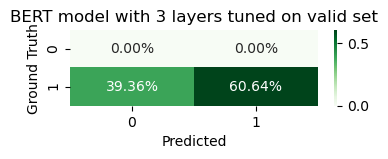

In [74]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_1 = confusion_matrix(result_valid['label'].values, result_valid['preds_bert_3'].values, normalize = 'true')
fig, (ax1) = plt.subplots(1,1, sharex=True, sharey=True,figsize=(4,1), dpi= 100, facecolor='w', edgecolor='k')
labels = ['0', '1']
cmap = sns.color_palette("Greens", as_cmap=True)
sns.heatmap(cm_1,annot=True, fmt=".2%", xticklabels = labels, yticklabels = labels, ax=ax1 ,cmap = cmap)
ax1.set(xlabel='Predicted', ylabel='Ground Truth', title='BERT model with 3 layers tuned on valid set')
plt.savefig("images/valid_bert_3.png")
plt.show()

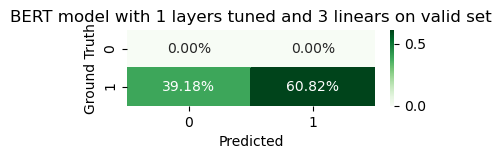

In [12]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_1 = confusion_matrix(result_valid['label'].values, result_valid['preds_bert_1_extra'].values, normalize = 'true')
fig, (ax1) = plt.subplots(1,1, sharex=True, sharey=True,figsize=(4,1), dpi= 100, facecolor='w', edgecolor='k')
labels = ['0', '1']
cmap = sns.color_palette("Greens", as_cmap=True)
sns.heatmap(cm_1,annot=True, fmt=".2%", xticklabels = labels, yticklabels = labels, ax=ax1 ,cmap = cmap)
ax1.set(xlabel='Predicted', ylabel='Ground Truth', title='BERT model with 1 layers tuned and 3 linears on valid set')
plt.show()

## FeatureBERT

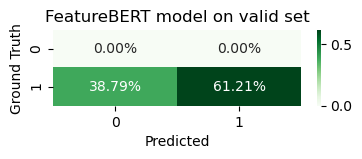

In [4]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_1 = confusion_matrix(result_valid['label'].values, result_valid['preds_featurebert'].values, normalize = 'true')
fig, (ax1) = plt.subplots(1,1, sharex=True, sharey=True,figsize=(4,1), dpi= 100, facecolor='w', edgecolor='k')
labels = ['0', '1']
cmap = sns.color_palette("Greens", as_cmap=True)
sns.heatmap(cm_1,annot=True, fmt=".2%", xticklabels = labels, yticklabels = labels, ax=ax1 ,cmap = cmap)
ax1.set(xlabel='Predicted', ylabel='Ground Truth', title='FeatureBERT model on valid set')
plt.show()

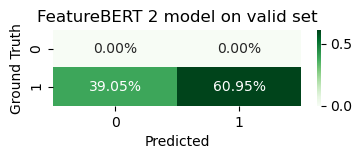

In [8]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_1 = confusion_matrix(result_valid['label'].values, result_valid['preds_featurebert_2'].values, normalize = 'true')
fig, (ax1) = plt.subplots(1,1, sharex=True, sharey=True,figsize=(4,1), dpi= 100, facecolor='w', edgecolor='k')
labels = ['0', '1']
cmap = sns.color_palette("Greens", as_cmap=True)
sns.heatmap(cm_1,annot=True, fmt=".2%", xticklabels = labels, yticklabels = labels, ax=ax1 ,cmap = cmap)
ax1.set(xlabel='Predicted', ylabel='Ground Truth', title='FeatureBERT 2 model on valid set')
plt.show()

In [52]:
result_valid.text[4]

'KeyBank Customer Confirm Your IdentityRev 158: - make he packet allocation routines take a mem_ctx,\n\twhich allows in http://samba.org/~tridge/ctdb revno   revisionid tridgesambaorg  f fa cd f f e parent tridgesambaorg  ec aa f  committer andrew tridgell branch nick tridge timestamp thu         message    make he packet allocation routines take a memctx which allows     us to put memory directly in the right context avoiding quite a few     tallocsteal calls and simplifying the code       make the fetch lock code in the daemon fully async modified   commonctdbcallc             ctdbcallc to h eejj kon     commonctdbclientc           ctdbclientc  kd v k steeya    commonctdbdaemonc           ctdbdaemonc  el kqgdb m ib g    ibibwctdbinitc             ibwctdbinitc cn z k ibx d     includectdbprivateh         ctdbprivateh o qt umlg en z     tcptcpinitc                 tcpinitc x q cu xzg g tm   diff too large for email   the limit is  '

In [53]:
result_valid.text[2]

'eBay account verification!Stock Notification for Netflix, Inc.contenttype textplain  charsetiso   contenttransferencoding  bit   netflix inc stock quote notification  the stock price for netflix nasdnflx has changed in value by    today          am   last price  change  open  day high   week high                         volume  previous close  day low   week low                     you are being emailed an alert whenever the stock valuation has increased or decreased by greater than    you are subscribed to netflix inc investor relations email alerts as avcoopersspeedyuwaterlooca  to update your email and alert preferences please click here  to unsubscribe please click here   netflix inc    winchester circle  los gatos ca    service provided by shareholdercom  contenttype texthtml  charsetiso   contenttransferencoding  bit stock quote notification the stock price for netflix nasdnflx has changed in value by    today       am last price change open day high  week high                  

In [67]:
result_valid.preds_bert.value_counts()

1    1393
0     886
Name: preds_bert, dtype: int64

In [66]:
result_valid

,text,subject,URLs,HTMLs,IPs,Attachments,EmailAddress,Receiver,label,is_same_domain,all_text,preds_svm,preds_rf,preds_lr,preds_lstm,preds_distilbert,preds_bert
0,IMPORTANT ACCOUNT NOTICE FROM SOUTHTRUST BANK ...,IMPORTANT ACCOUNT NOTICE FROM SOUTHTRUST BANK ...,NaN,"http://202.99.223.139/rpm/, https://www.southt...",202.99.223.139,1,identdep_op718@southtrust.com,NaN,1,0,"Redbull, Honda, IBM, AOL und McDonaldscontentt...",1,1,1,1,1,1
1,eBay account verification!=?GB2312?B?08W73bT6v...,eBay account verification!,NaN,"http://hform.com/form.cgi?10081481, http://sig...",NaN,0,emailconfirm@ebay.com,NaN,1,0,=?GB2312?B?08W73bT6v6q3osax?=äúºã£¡ ...,1,1,1,1,1,1
2,eBay account verification!Stock Notification f...,eBay account verification!,NaN,http://signin.ebay.com//aw-cgi/eBayISAPI.dll?S...,NaN,0,emailconfirm@ebay.com,NaN,1,0,"Stock Notification for Netflix, Inc.contenttyp...",0,0,0,0,0,0
3,KeyBank Customer Confirm Your IdentityThe Unit...,KeyBank Customer Confirm Your Identity,NaN,https://accounts2.keybank.com/ib2/images/enrol...,218.55.77.130,0,support@keybank.com,NaN,1,0,The United States National Medical Association...,1,1,1,1,1,1
4,KeyBank Customer Confirm Your IdentityRev 158:...,KeyBank Customer Confirm Your Identity,NaN,https://accounts2.keybank.com/ib2/images/enrol...,218.55.77.130,0,support@keybank.com,NaN,1,0,Rev 158: - make he packet allocation routines ...,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2274,your paypal account need to be updated!go equa...,your paypal account need to be updated!,NaN,http://images.postdirect.com/master/9/903224/p...,NaN,0,online-service@paypalini.com,NaN,1,0,go equation boundarynextpart c bcb b...,1,1,1,1,1,1
2275,Message from eBay member SCE Negative CTC Clai...,Message from eBay member,NaN,"http://pics.ebaystatic.com/aw/pics/s.gif, http...",NaN,0,eBay_sellers_messages@eBay_memmber.com,NaN,1,0,SCE Negative CTC Claimmike day believes that s...,0,0,0,0,0,0
2276,Confirm Your Account Details! (message id: g48...,Confirm Your Account Details! (message id: g48...,NaN,http://userconfirmationform-id653615903.ebay.c...,NaN,0,csteam.refGO578668054014.nf@ebay.com,NaN,1,0,FRANKF MARKT ALLE!contenttype texthtml charse...,1,1,1,1,1,1
2277,your paypal account need to be updated!his the...,your paypal account need to be updated!,NaN,http://images.postdirect.com/master/9/903224/p...,NaN,0,serviceconfirms@pay-pal.com,NaN,1,0,his the trust boundarynextpart c ae ...,1,1,1,1,1,1


In [5]:
with open('/home/ec2-user/SageMaker/email_phishing/Huaibo/data/trigger_words.txt', 'r') as file:
    # Read all the lines into a list
    lines = file.readlines()

# Remove the newline character from each line using strip()
trigger_words = [line.strip() for line in lines]

# Print the list of lines without the newline character
print(trigger_words)

['Accept credit cards', 'Acceptance', 'Access', 'Access now', 'Access for free', 'Accordingly', 'Act Now', 'Act immediately', 'Action', 'Action required', 'Ad', 'Additional income', 'Addresses on CD', 'Affordable', 'Affordable deal', 'All natural', 'All new', 'Amazed', 'Amazing', 'Amazing offer', 'Amazing stuff', 'Apply here', 'Apply now', 'Apply Online', 'As seen on', 'At no cost', 'Auto email removal', 'Avoid', 'Avoid bankruptcy', 'Bargain', 'Be amazed', 'Be surprised', 'Be your own boss', 'Believe me', 'Being a member', 'Beneficiary', 'Best bargain', 'Best deal', 'Best price', 'Best offer', 'Beverage', 'Big bucks', 'Bill 1618', 'Billing', 'Billing address', 'Billionaire', 'Billion', 'Billion dollars', 'Bonus', 'Boss', 'Brand new pager', 'Bulk email', 'Buy', 'Buy now', 'Buy direct', 'Buying judgments', 'Cable converter', 'Call', 'Call free', 'Call me', 'Call now', 'Calling creditors', 'Can’t live without', 'Cancel', 'Cancel at any time', 'Cancel now', 'Cancellation required', 'Cannot

In [6]:
def check_word(txt):
    for word in trigger_words:
        if word in txt:
            return 1
    return 0